In [15]:
import pickle
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [4]:
wmt19_toen = pickle.load(open('./wmt19_toen_bleurt.pkl', 'rb'))
wmt19_toen

,system,sid,raw_score,score,N,lp,reference,source,output,year,bleurt
27600,DBMS-KU-KKEN.6726,751,2.0,-1.463163,1,kk-en,Three professional boxers from Kazakhstan will...,Қазақстандық үш кәсіпқой боксшы Мәскеуде жекпе...,three кәсіпқой қазақстандық боксшы өткізеді же...,2019,-1.628130
27601,CUNI-T2T-transfer-kken.6436,751,92.5,0.820222,2,kk-en,Three professional boxers from Kazakhstan will...,Қазақстандық үш кәсіпқой боксшы Мәскеуде жекпе...,Three Kazakh professional boxers will fight in...,2019,0.582905
27602,UMD.6736,751,70.0,-0.203777,1,kk-en,Three professional boxers from Kazakhstan will...,Қазақстандық үш кәсіпқой боксшы Мәскеуде жекпе...,Kazakhstan's boxer's team will compete for the...,2019,-0.418227
27603,NICT.6770,751,60.5,0.408585,2,kk-en,Three professional boxers from Kazakhstan will...,Қазақстандық үш кәсіпқой боксшы Мәскеуде жекпе...,Three professional boxers of Kazakhstan will c...,2019,0.500814
27604,online-G.0,751,92.5,0.820222,2,kk-en,Three professional boxers from Kazakhstan will...,Қазақстандық үш кәсіпқой боксшы Мәскеуде жекпе...,Three Kazakh professional boxers will fight in...,2019,0.582905
...,...,...,...,...,...,...,...,...,...,...,...
108921,tilde-nc-nmt.6881,850,29.0,-1.600210,2,lt-en,If the State Consumer Rights Protection Author...,Valstybinei vartotojų teisių apsaugos tarnybai...,If the State Consumer Rights Protection Author...,2019,0.351030
108922,online-G.0,850,14.0,-0.996679,1,lt-en,If the State Consumer Rights Protection Author...,Valstybinei vartotojų teisių apsaugos tarnybai...,The state consumer rights protection authority...,2019,0.031293
108923,MSRA.MASS.6945,850,50.0,-0.841789,1,lt-en,If the State Consumer Rights Protection Author...,Valstybinei vartotojų teisių apsaugos tarnybai...,If the State Consumer Rights Protection Author...,2019,0.300797
108924,TartuNLP-c.6908,850,79.0,0.360166,2,lt-en,If the State Consumer Rights Protection Author...,Valstybinei vartotojų teisių apsaugos tarnybai...,State Consumer Rights Protection Service (VVTA...,2019,0.101297


In [6]:
wmt19_toen.lp.unique()

array(['kk-en', 'fi-en', 'gu-en', 'ru-en', 'lt-en'], dtype=object)

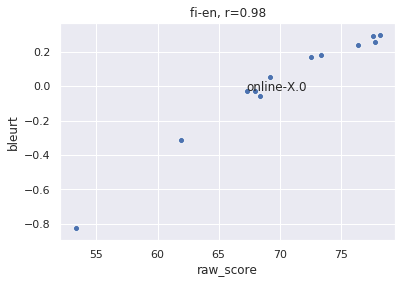

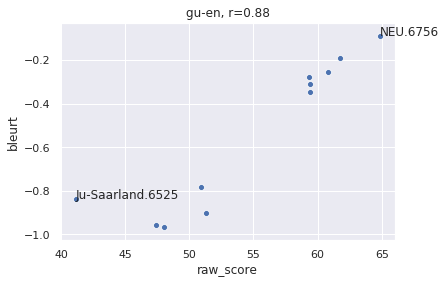

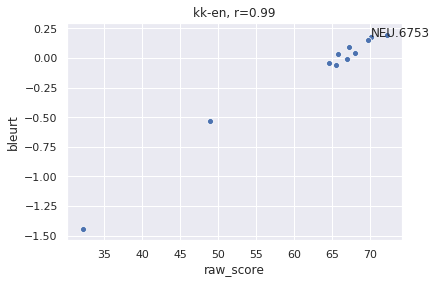

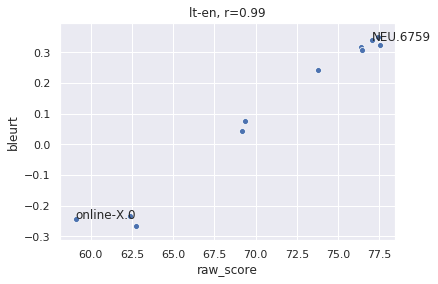

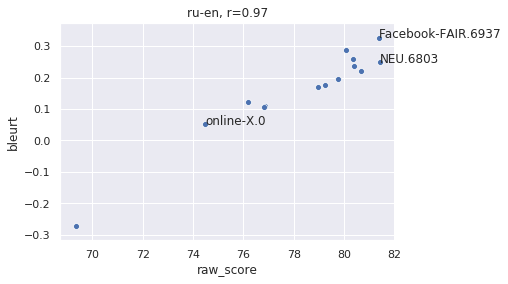

In [56]:
for i, group in wmt19_toen.groupby('lp'):
    means = group.groupby('system').mean()
    corr = means.corr()['score']['bleurt']
    
    plt.figure()
    plt.title('%s, r=%.2f' % (i, corr))
    sns.scatterplot(x='raw_score', y='bleurt', data=means)
    
    for i, row in means.iterrows():
        if any(j in i for j in ['Saarland', 'online-X', 'Facebook-FAIR', 'NEU']):
            plt.annotate(i, (row['raw_score'], row['bleurt']))